In [1]:
import networkx as nx
import osmnx as ox
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from IPython.display import IFrame
from operator import attrgetter
import time
ox.config(log_console=True, use_cache=True)
import numpy 
import sys
numpy.set_printoptions(threshold=sys.maxsize)


In [2]:
place = 'Piedmont, California, USA'
G = ox.graph_from_place(place, network_type='drive_service')
G = ox.project_graph(G)
## to be deleted
G = ox.graph_from_place(place, network_type='drive_service')
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)


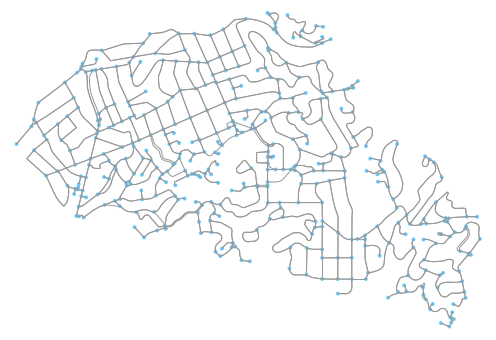

In [3]:
fig, ax = ox.plot_graph(G)

In [46]:
filepath = './graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [10]:
source_node = G[53124805]
destination_node = G[5477879797]

class Node:
    # TODO : __slots__ not __dict___ -- Optimization
    def __init__(self, node, osmid, distance = 0, parent = None):
        self.node = node
        self.distance = distance
        self.parent = parent
        self.osmid = osmid
        
        # I need this for dijkstra
        self.from_origin = self.distance_from_origin()
    
    # TODO : list comprehension -- Optimization
    def expand(self):
        children = [Node(G[child], child, distance = self.node[child][0]['length'], parent = self) \
                         for child in self.node]
        return children
    
    def path(self):
        node = self
        path = []
        while node:
            path.append(node.osmid)
            node = node.parent
        return path[::-1]
    
    # TODO : better algorithm -- Optimization
    # I don't need to go to the parent to get the distance
    # every time I invoke the function
    
    def distance_from_origin(self):
        meters = 0
        node = self
        while node:
            meters += node.distance
            node = node.parent
        return meters

    def __eq__(self, other):
        try:
            return self.osmid == other.osmid
        except:
            return self.osmid == other
            
    
    def __hash__(self):
        return hash(self.osmid)
    
    
origin = Node(source_node, 53124805, distance = 0, parent = None)
print(origin.node)
print("******************************")
children = origin.expand()

for child in children:
    print(child.osmid)
    print(child.node)
    print("><><><><><><><")
print("-----------------------------llll---------------------")
nextgeneration = children[0].expand()

for node in nextgeneration:
    print(node.osmid)
    print(node.node)
    print("><><><><><><><")
print("--------------------------------------------------")

for node in nextgeneration:
    print(node.osmid)
    print(node.from_origin)
print("-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l")

nextnextgeneration = nextgeneration[0].expand()

for node in nextnextgeneration:
    print(node.osmid)
    print(node.node)
    print("><><><><><><><")
print("--------------------------------------------------")

for node in nextnextgeneration:
    print(node.osmid)
    print(node.from_origin)
print("-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l")

{53124807: {0: {'osmid': 6380382, 'name': 'Sea View Avenue', 'highway': 'residential', 'oneway': False, 'length': 126.23}}, 53124803: {0: {'osmid': 6380382, 'name': 'Sea View Avenue', 'highway': 'residential', 'oneway': False, 'length': 434.29499999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f886d51f588>}}, 2518218246: {0: {'osmid': 518506895, 'name': 'Hampton Road', 'lanes': '2', 'highway': 'tertiary', 'oneway': False, 'length': 38.315, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f886d51f5c0>}}, 53125997: {0: {'osmid': 518506896, 'name': 'Hampton Road', 'highway': 'tertiary', 'oneway': False, 'length': 111.111, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f886d51f668>}}}
******************************
53124807
{53092201: {0: {'osmid': 6380382, 'name': 'Sea View Avenue', 'highway': 'residential', 'oneway': False, 'length': 148.657}}, 53124805: {0: {'osmid': 6380382, 'name': 'Sea View Avenue', 'highway': 'residential'

In [54]:
nextnextgeneration

In [55]:
# So using the following ling we could do Dijkstra

minimum = min(nextnextgeneration, key = attrgetter('from_origin'))

In [56]:
# TODO: better algorithm for picking the closest element in Dijkstra -- Readability

nextnextgeneration.remove(minimum) 

In [57]:
nextnextgeneration

In [58]:
node_Xs = [float(x) for _, x in G.nodes(data='x')]
node_Ys = [float(y) for _, y in G.nodes(data='y')]
edges = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)
west, south, east, north = edges.total_bounds

In [59]:
# I copied that list from the BFS algorithm written at the bottom
# route = [53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]

# I copided that list from the DFS algorithm written at the bottom
# route = [53124805, 53125997, 53046251, 53046250, 53027463, 53027461, 53027459, 53074380, 53134227, 53118372, 53073822, 53097585, 53118368, 53059186, 683050194, 53097586, 53126347, 53126350, 53118380, 53112476, 53112473, 53112467, 245118288, 53059175, 53037307, 53059173, 53093372, 53059189, 53059166, 53093365, 53085387, 53093362, 53060467, 53060468, 53085385, 53111730, 53144625, 53137611, 53113946, 53076250, 2834093713, 53115407, 53041440, 53041442, 53042706, 53089336, 53093359, 53119166, 53119168, 2834814897, 53025057, 53082621, 318538000, 53082625, 206141022, 53082627, 53073691, 53033660, 53040495, 53085375, 53085377, 53027454, 53085380, 53021750, 53021742, 683050219, 53023513, 53122757, 317339074, 53036558, 53090323, 53090322, 53082634, 53082640, 53082643, 53076399, 53076395, 53100222, 53076392, 53100223, 53082631, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 53145241, 4918961132, 53018411, 53018397, 53018399, 53078914, 53085009, 682821166, 53062956, 53057704, 5477879796, 5477879797]

# I copied that list from Dijkstra algorithm written at the bottom
# route = [53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]



In [60]:
# route_map = ox.plot_route_folium(G, route)
# route

In [61]:
# filepath = 'route.html'
# route_map.save(filepath)
# IFrame(filepath, width=600, height=500)

G.nodes[53124805]['x']

-122.2228614

In [63]:
route = [53124805,
53124807,
53124803,
2518218246,
53125997,
53092201,
53133008,
53074376,
53127240,
53125999,
305541919,
53046251,
53092203,
53092199,
246744892,
53046254,
53074377,
53118376,
53046249,
53126000,
702970702,
53046252,
53046250,
53046255,
53092214,
53046253,
53074380,
53156140,
53118374,
53112476,
53027461,
    53088880,
53092218,
702970720,
53101282,
53027463,
53092207,
53050874,
53027459,
53134227,
53156142,
53108990,
53112473,
53118380,
53079888,
53092220,
53080198,
53075311,
53101285,
53142908,
53152062,
53092210,
53050875,
2391023394,
2391023402,
53118372,
53108992,
53112467,
53148306,
53126350,
683050115,
4606504193,
        7424080867,
53064305,
53064302,
256340150,
256339663,
53044661,
53156410,
53085382,
53156408,
53027457,
53073822,
53126347,
245118288,
245118772,
53037306,
53059175,
245370192,
7424080861,
7424080875,
53064300,
245384115,
53092226,
53044664,
53059885,
53156415,
683050221,
53023513,
53027455,
53044575,
53097585,
53097586,
245118387,
53037307,
53093372,
53088882,
4612591433,
7424080866,
53116662,
53116661,
53092228,
53144226,
53118296,
256338428,
53149671,
53156417,
53021750,
683050219,
53122757,
305541020,
53040495,
53044573,
53073816,
53118368,
683050194,
245118228,
53097380,
53059173,
53059189,
53152921,
53116664,
245386862,
683790465,
53125573,
53118299,
53143485,
53149673,
256338813,
53085380,
53021742,
53116302,
317339074,
53085377,
53027454,
53085375,
53033660,
53118366,
53059186,
3695575152,
53086074,
2286923086,
683050120,
53059187,
53059166,
53116672,
245387557,
53125973,
53125575,
53144229,
5477686667,
53143484,
53090940,
256338812,
53022623,
53021743,
53116304,
53068822,
317339068,
53036558,
432431093,
53073691,
683050204,
5484284270,
2286923094,
53102808,
5484284264,
53093365,
53146451,
245387832,
53125974,
683790519,
53041437,
5477686669,
370467066,
256338809,
317364095,
53022625,
53116276,
53068826,
682931951,
53036557,
433574682,
53095909,
53090323,
53073689,
53082627,
53085389,
5484284272,
53025220,
53085388,
5484284269,
53085387,
53041432,
5477686677,
245505820,
53145205,
256338808,
53091598,
53066716,
260707479,
260707482,
686194326,
53090322,
53028192,
53073843,
260706808,
5484284278,
53025060,
206141021,
53025222,
53119168,
53078467,
53093362,
245505298,
5477686659,
53068829,
53066717,
53149343,
53082634,
53028190,
53152083,
5484284276,
206141022,
2834814897,
53093360,
53119166,
53078468,
53060468,
53060467,
5477686670,
5477686662,
683050066,
53149344,
53082632,
53082640,
53152069,
53082631,
53025057,
53093359,
53060466,
3164026067,
53042707,
53078469,
53060469,
53085385,
2890584258,
5477686671,
317363251,
53157145,
53082643,
53152068,
53100223,
53082621,
53089336,
53060465,
53113947,
3164026063,
53042706,
53041443,
53060471,
53060473,
53142555,
53111730,
53035699,
245523440,
53082644,
53076399,
5477879803,
53076395,
53082619,
318538000,
53060462,
53111728,
53041442,
5484284279,
53119164,
53100813,
53078473,
53144625,
53035698,
686202982,
53128729,
5477879802,
53100222,
53041445,
53125725,
53082625,
5477880004,
53041668,
53113946,
53093356,
53041440,
4614826929,
5484284281,
53081990,
956500319,
53137611,
703006798,
53082645,
53149520,
53128727,
53134176,
53117166,
53155115,
53076392,
2833994093,
5484284273,
53076250,
53041670,
53113943,
53114734,
53115407,
4614826934,
53081989,
53119162,
53140452,
53140454,
53117097,
53117160,
4918961128,
53117098,
53076391,
53128733,
5484284275,
2834093713,
247141128,
2834816916,
53114732,
53114727,
53064331,
442842707,
256543149,
6598004529,
4918961127,
53062958,
53076384,
2834031502,
53076247,
687156433,
53114730,
53124973,
53114726,
53076382,
53064330,
3581678802,
7226803955,
256542898,
6598004532,
4918961130,
53145241,
697180285,
317295966,
317295988,
53076246,
53075606,
53077316,
53123865,
4671607162,
53018404,
53107191,]

import matplotlib.animation as animation

nc = colors[23]
ns = [50 if node in route else 8 for node in G.nodes()]
len(colors)
import numpy as np
colors=np.array(colors)

In [72]:
import matplotlib.animation as animation

def update_plot(i, data, scat):
    print(i)
    scat.set_array(data[i])
    return scat,

def animate_simple():
    numframes = len(colors)
    fig, ax =  plt.subplots(figsize=(15, 11))
    ax.set_facecolor('w')
    lines = []
    for u, v, data in G.edges(keys=False, data=True):
            if 'geometry' in data:
                xs, ys = data['geometry'].xy
                lines.append(list(zip(xs, ys)))
            else:
                x1 = G.nodes[u]['x']
                y1 = G.nodes[u]['y']
                x2 = G.nodes[v]['x']
                y2 = G.nodes[v]['y']
                line = [(x1, y1), (x2, y2)]
                lines.append(line)

    lc = LineCollection(lines, colors='#999999', linewidths=0.9, alpha=0.3)

    ax.add_collection(lc)
    scat = ax.scatter(node_Xs, node_Ys,c=colors[0], s=ns)
    ani = animation.FuncAnimation(fig, update_plot, frames=list(range(numframes)),
                                 fargs = (colors, scat))
    plt.show()
    
    
animate_simple()



# fig, ax = plt.subplots(figsize=(15,11))
# ax.set_facecolor('w')

# lines = []
# for u, v, data in G.edges(keys=False, data=True):
#         if 'geometry' in data:
#             xs, ys = data['geometry'].xy
#             lines.append(list(zip(xs, ys)))
#         else:
#             x1 = G.nodes[u]['x']
#             y1 = G.nodes[u]['y']
#             x2 = G.nodes[v]['x']
#             y2 = G.nodes[v]['y']
#             line = [(x1, y1), (x2, y2)]
#             lines.append(line)
            
# lc = LineCollection(lines, colors='#999999', linewidths=0.9, alpha=0.3)

# ax.add_collection(lc)

# scat = ax.scatter(node_Xs, node_Ys, c=nc, s=ns)

# # ax.get_xaxis().set_visible(False)
# # ax.get_yaxis().set_visible(False)
# # anim = animation.FuncAnimation(fig, update_plot, frames=range(len(colors)), fargs=(colors, scat))

# plt.show()



0


AttributeError: 'list' object has no attribute 'ndim'

<Figure size 1080x792 with 1 Axes>

In [ ]:
colors

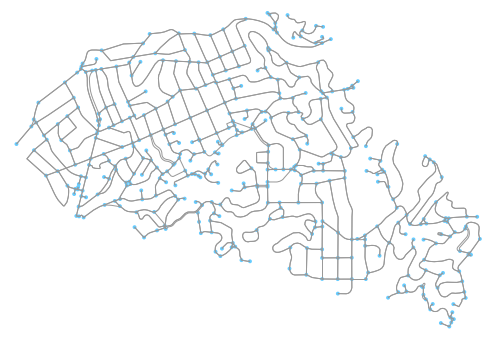

In [65]:
ax.set_facecolor('black')
fig

In [66]:
from math import inf
from collections import deque
import sys

# TODO : delete these numbers -- readability

origin = Node(source_node, 53124805, distance = 0, parent = None)
destination = Node(destination_node, 5477879797)

In [62]:
# Breadth First Search 

# colors = [nc]
colors = []
%time

frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    node = frontier.popleft()
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)
    frontierOsmid = [node.osmid for node in explored]
    colornow = [6 if node in frontierOsmid else 1 for node in G.nodes()]
    colors.append(colornow)
colors

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
[53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]


[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [67]:
# Depth First Search

%time

frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    node = frontier.pop()
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
[53124805, 53125997, 53046251, 53046250, 53027463, 53027461, 53027459, 53074380, 53134227, 53118372, 53073822, 53097585, 53118368, 53059186, 683050194, 53097586, 53126347, 53126350, 53118380, 53112476, 53112473, 53112467, 245118288, 53059175, 53037307, 53059173, 53093372, 53059189, 53059166, 53093365, 53085387, 53093362, 53060467, 53060468, 53085385, 53111730, 53144625, 53137611, 53113946, 53076250, 2834093713, 53115407, 53041440, 53041442, 53042706, 53089336, 53093359, 53119166, 53119168, 2834814897, 53025057, 53082621, 318538000, 53082625, 206141022, 53082627, 53073691, 53033660, 53040495, 53085375, 53085377, 53027454, 53085380, 53021750, 53021742, 683050219, 53023513, 53122757, 317339074, 53036558, 53090323, 53090322, 53082634, 53082640, 53082643, 53076399, 53076395, 53100222, 53076392, 53100223, 53082631, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 53145241, 4918961132, 53018411

In [68]:
%time

frontier = [origin]
explored = set()
found = False
while frontier and not found:
    # This is the closest node to the origin .. this is pretty much Dijkstra algorithm
    node = min(frontier, key = attrgetter('from_origin'))
    frontier.remove(node)
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs
[53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]


In [69]:
# astar algorithm
# we need to start with some layout and utilities

# TODO : have an independent file/module for such utilities 

import math
import heapq

distanceGoal = dict()
distanceOrigin = dict()

originX = G.nodes[53124805]['x']
originY = G.nodes[53124805]['y']

destX = G.nodes[5477879797]['x']
destY = G.nodes[5477879797]['y']
for node in G:
    pointX = G.nodes[node]['x']
    pointY = G.nodes[node]['y']

    originDest = math.sqrt((pointX-originX)**2 + (pointY-originY)**2)
    destDist = math.sqrt((pointX-destX)**2 + (pointY-destY)**2)
    
    distanceGoal[node] = originDest
    distanceOrigin[node] = destDist


In [70]:
## This is a VERY generic priority queue to handle the sorting of the open set
## with respect to its linear distance between origin and destination ... the typical A* algorithm


class PriorityQueue:
    """A Queue in which the minimum (or maximum) element (as determined by f and
    order) is returned first.
    If order is 'min', the item with minimum f(x) is
    returned first; if order is 'max', then it is the item with maximum f(x).
    Also supports dict-like lookup."""

    def __init__(self, order='min', f=lambda x: x):
        self.heap = []
        if order == 'min':
            self.f = f
        elif order == 'max':  # now item with max f(x)
            self.f = lambda x: -f(x)  # will be popped first
        else:
            raise ValueError("Order must be either 'min' or 'max'.")

    def append(self, item):
        """Insert item at its correct position."""
        heapq.heappush(self.heap, (self.f(item), item))

    def extend(self, items):
        """Insert each item in items at its correct position."""
        for item in items:
            self.append(item)

    def pop(self):
        """Pop and return the item (with min or max f(x) value)
        depending on the order."""
        if self.heap:
            return heapq.heappop(self.heap)[1]
        else:
            raise Exception('Trying to pop from empty PriorityQueue.')

    def __len__(self):
        """Return current capacity of PriorityQueue."""
        return len(self.heap)

    def __contains__(self, key):
        """Return True if the key is in PriorityQueue."""
        return any([item == key for _, item in self.heap])

    def __getitem__(self, key):
        """Returns the first value associated with key in PriorityQueue.
        Raises KeyError if key is not present."""
        for value, item in self.heap:
            if item == key:
                return value
        raise KeyError(str(key) + " is not in the priority queue")

    def __delitem__(self, key):
        """Delete the first occurrence of key."""
        try:
            del self.heap[[item == key for _, item in self.heap].index(True)]
        except ValueError:
            raise KeyError(str(key) + " is not in the priority queue")
        heapq.heapify(self.heap)



In [71]:
frontier = PriorityQueue('min', lambda node: distanceGoal[node.osmid] + distanceOrigin[node.osmid])

colors = []
frontier.append(origin)
explored = set()
found = False
while frontier and not found:
    node = frontier.pop()
    print(node.osmid)
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)
    frontierOsmid = [node.osmid for node in explored]
    colornow = [40232222232 if node in frontierOsmid else 33331 for node in G.nodes()]
    colors.append(colornow)


53124805
53125997
53046251
53046252
53101282
53101285
53142908
53156410
53156415
53156417
53050875
53050874
53156408
53046253
53152062
53085382
53023513
53122757
53116302
53116304
53068822
317339074
317339068
53116276
53036558
53036557
53095909
53073843
53152083
53082631
53082632
53152069
53090323
53082634
260706808
53090322
317363251
53066716
53066717
683050066
682931951
53100223
53068826
53076395
433574682
260707482
53100222
53076392
260707479
686194326
53082640
53157145
53091598
53027463
53028192
53028190
53155115
53082643
53046254
53068829
683050219
53149343
53021742
53022623
53022625
317364095
53149344
53082644
683050221
53021750
53076391
53117160
6598004529
53117166
4918961128
4918961127
53062958
4918961130
5477879796
[53124805, 53125997, 53046251, 53046252, 53101282, 53142908, 53156410, 53156408, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53082631, 53100223, 53076395, 53100222, 53076392, 53076391, 53117160, 53117166, 4918961128, 53